In [20]:
#algorithm D1

#main goal is to look at every part of the image and try to find the total number of apple

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing.image import load_img
from keras.preprocessing.image import load_img
from keras.preprocessing.image import save_img
from keras.preprocessing.image import img_to_array
from PIL import Image
import matplotlib.pyplot as plt

**Import and test 1 image**

---

In [26]:
path_image = '/Users/Shadow/Desktop/Projet Machine Vision/detection/test/images/'
   

image_name = path_image + 'dataset1_back_1' + '.png'
  
image_abs = Image.open(image_name)

  #resize image
new_image = image_abs.resize((736, 1280))

  #conv array
array_image = img_to_array(new_image)


#array_image = np.expand_dims(array_image, axis=0)

#print(array_image.shape)

Split image in smaller one

In [27]:
k=0

im = new_image
for i in range(0,1248,32):
    for j in range(0,704,32):
        box = (j, i, j+32, i+32)
        a = im.crop(box)
        #o = a.crop(area)
        val_images[k,:,:] = a
        k = k + 1


In [28]:
#resize to 0-1
val_images = val_images / 255.0

print(val_images.shape)

(930, 32, 32, 3)


In [33]:
print(val_images[0,:,:,:].shape)

(32, 32, 3)


Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
number of apple
[345]


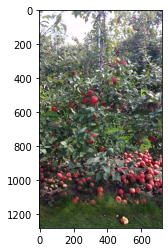

In [35]:
from keras.models import load_model


model = load_model('R1_version_1.h5')

number_apple = 0

for i in range(0,929):
        
    image_i = val_images[i,:,:,:]
    
    image_i = np.expand_dims(image_i, axis=0)
    
    nb_local = model.predict_classes(image_i)
    
    number_apple = number_apple + nb_local
    
plt.imshow(image_abs)
print("number of apple")
print(number_apple)

    